In [1]:
{-# LANGUAGE FlexibleContexts, MonadComprehensions, NoImplicitPrelude, RebindableSyntax #-}
import Language.Stochaskell
stochaskell

Stochaskell, version 0.1.0
Copyright (C) 2015-2020 David A Roberts
This program comes with ABSOLUTELY NO WARRANTY.
This is free software, and you are welcome to redistribute it
under certain conditions; see the LICENSE for details.

Using installation directory at 
  /home/jovyan/stochaskell

In [2]:
popularLocationPrior :: P B
popularLocationPrior = bernoulli 0.55

alice :: Integer -> P B
alice depth = [ a | a <- popularLocationPrior, b <- bob (depth-1), a == b ]

bob :: Integer -> P B
bob depth | depth == 0 = [ b | b <- popularLocationPrior ]
          | otherwise  = [ b | b <- popularLocationPrior, a <- alice depth, a == b ]

In [3]:
alice 3

let v_0_0 = getExternal x_show_0_0 :: B
    v_0_1 = getExternal x_show_0_1 :: B
    v_0_2 = getExternal x_show_0_2 :: B
    v_0_3 = getExternal x_show_0_3 :: B
    v_0_4 = getExternal x_show_0_4 :: B
    v_0_5 = getExternal x_show_0_5 :: B
    v_0_6 = x_show_0_4 == x_show_0_5 :: B
    v_0_7 = x_show_0_3 == x_show_0_4 :: B
    v_0_8 = x_show_0_2 == x_show_0_3 :: B
    v_0_9 = x_show_0_1 == x_show_0_2 :: B
    v_0_10 = x_show_0_0 == x_show_0_1 :: B
 in do x_show_0_0 <- bernoulli 0.55 :: P B
       x_show_0_1 <- bernoulli 0.55 :: P B
       x_show_0_2 <- bernoulli 0.55 :: P B
       x_show_0_3 <- bernoulli 0.55 :: P B
       x_show_0_4 <- bernoulli 0.55 :: P B
       x_show_0_5 <- bernoulli 0.55 :: P B
       return [x_show_0_0]

In [4]:
:opt svg
import Language.Stochaskell.Plot

In [5]:
count bs = sum [if boolean b then 1 else 0 | b <- bs] / genericLength bs

In [6]:
freqs <- sequence [count <$> sequence [simulate (alice depth) | _ <- [1..1000]] | depth <- [1..6]]

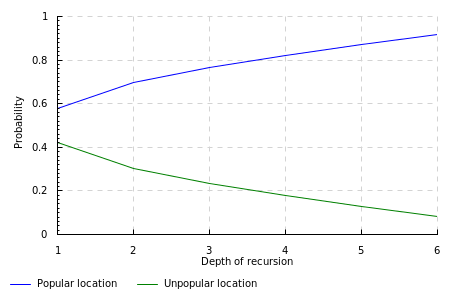

In [7]:
toRenderable $ do
  plot $ line "Popular location" [[1..] `zip` freqs]
  plot $ line "Unpopular location" [[1..] `zip` fmap (1-) freqs]
  xlabel "Depth of recursion"
  ylabel "Probability"